In [25]:
import cv2
import mediapipe as mp
import pandas as pd
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic

In [26]:
# cap = cv2.VideoCapture(1)
# with mp_holistics.Holistic(
#     min_detection_confidence=0.8,
#     min_tracking_confidence=0.8
# ) as holistic:
#     while cap.isOpened():
#         success,image=cap.read()
#         cv2.imshow('Webcam', image)
#         if not success:
#             print('Ignoring empty frames')
#             continue
#         image.flags.writeable = False
#         # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#         results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

#         print(result)
#         break
# cap.release()


In [27]:
# For webcam input:
cap = cv2.VideoCapture(1)
with mp_holistic.Holistic(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as holistic:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = holistic.process(image)

    # Draw landmark annotation on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    mp_drawing.draw_landmarks(
        image,
        results.face_landmarks,
        mp_holistic.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp_drawing_styles
        .get_default_face_mesh_contours_style())
    mp_drawing.draw_landmarks(
        image,
        results.pose_landmarks,
        mp_holistic.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles
        .get_default_pose_landmarks_style())
    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Holistic', cv2.flip(image, 1))
    if cv2.waitKey(5) & 0xFF == 27:
      break
cap.release()


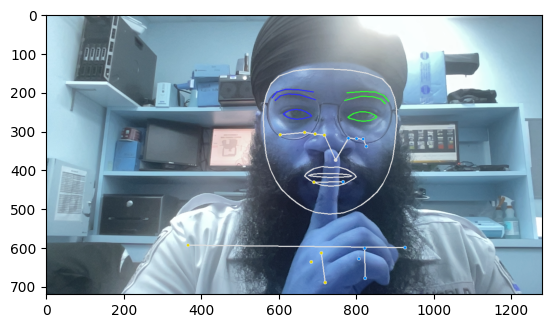

In [28]:
import matplotlib.pyplot as plt
plt.imshow(image)


In [29]:
results.face_landmarks


landmark {
  x: 0.5727052
  y: 0.5482205
  z: -0.0382367
}
landmark {
  x: 0.5717308
  y: 0.4747987
  z: -0.06589444
}
landmark {
  x: 0.5720357
  y: 0.49716026
  z: -0.03666429
}
landmark {
  x: 0.5610131
  y: 0.40980175
  z: -0.04665592
}
landmark {
  x: 0.57173306
  y: 0.45456553
  z: -0.069280215
}
landmark {
  x: 0.57182026
  y: 0.42858285
  z: -0.063153006
}
landmark {
  x: 0.57240564
  y: 0.36578348
  z: -0.026753848
}
landmark {
  x: 0.48222977
  y: 0.36359417
  z: 0.020447483
}
landmark {
  x: 0.5727813
  y: 0.31222647
  z: -0.01578246
}
landmark {
  x: 0.57301
  y: 0.28372496
  z: -0.01682827
}
landmark {
  x: 0.57355165
  y: 0.19666302
  z: 0.0015198663
}
landmark {
  x: 0.5728085
  y: 0.5581986
  z: -0.03679449
}
landmark {
  x: 0.5728239
  y: 0.5665796
  z: -0.032998182
}
landmark {
  x: 0.57284945
  y: 0.57059246
  z: -0.027954854
}
landmark {
  x: 0.5729121
  y: 0.58354515
  z: -0.023933878
}
landmark {
  x: 0.5728763
  y: 0.59199226
  z: -0.02640459
}
landmark {
  x: 0.

In [30]:
## new dataset


# landmarks = pd.DataFrame()
# if results.face_landmarks:
#         for i, point in enumerate(results.face_landmarks.landmark):         
#                 landmarks.loc[0, [f"x_face_{i}",f"y_face_{i}",f"z_face_{i}"]] = [point.x, point.y, point.z]
# if results.pose_landmarks:
#         for i, point in enumerate(results.pose_landmarks.landmark):
#                 landmarks.loc[0, [f"x_pose_{i}",f"y_pose_{i}",f"z_pose_{i}"]]= [point.x, point.y, point.z]
# if results.left_hand_landmarks:
#         for i, point in enumerate(results.left_hand_landmarks.landmark):        
#                 landmarks.loc[0, [f"x_left_hand_{i}",f"y_left_hand_{i}",f"z_left_hand_{i}"]] = [point.x, point.y, point.z]
# if results.right_hand_landmarks:
#         for i, point in enumerate(results.right_hand_landmarks.landmark):
#                 landmarks.loc[0, [f"z_right_hand_{i}",f"z_right_hand_{i}",f"z_right_hand_{i}"]] = [point.x, point.y, point.z] 

#         # landmarks.loc[0, f"y_face_{i}"] = point.y 
#         # landmarks.loc[0, f"z_face_{i}"] = point.z

    


In [31]:
# face['y'] = -face['y']
# # face.plot(x='x', y='y', kind='scatter')

In [32]:
# landmarks = pd.DataFrame()
# face.shape
## kaggle data
train = pd.read_csv('train.csv.zip')
pq_file = "train_landmark_files/16069/100015657.parquet"
xyz = pd.read_parquet(pq_file)

In [33]:
def create_frame_landmark_df(results, frame):
    xyz_skel = xyz[['type','landmark_index']].drop_duplicates().reset_index(drop=True).copy()

    face = pd.DataFrame()
    pose = pd.DataFrame()
    left_hand = pd.DataFrame()
    right_hand = pd.DataFrame()
    if results.face_landmarks:
        for i, point in enumerate(results.face_landmarks.landmark):
            face.loc[i, ['x','y','z']] = [point.x, point.y, point.z]
    if results.pose_landmarks:
        for i , point in enumerate(results.pose_landmarks.landmark):
            pose.loc[i, ['x', 'y', 'z']] = [point.x, point.y, point.z]
    if results.left_hand_landmarks:
        for i, point in enumerate(results.left_hand_landmarks.landmark):
            left_hand.loc[i, ['x','y','z']] = [point.x, point.y, point.z]
    if results.right_hand_landmarks:
        for i, point in enumerate(results.right_hand_landmarks.landmark):
            right_hand.loc[i, ['x', 'y', 'z']] = [point.x, point.y, point.z]   
    face = face.reset_index() \
        .rename(columns={'index':'landmark_index'}) \
            .assign(type='face')
    pose = pose.reset_index() \
        .rename(columns={'index':'landmark_index'}) \
            .assign(type='pose')
    left_hand = left_hand.reset_index() \
        .rename(columns={'index':'landmark_index'}) \
            .assign(type='left_hand')
    right_hand = right_hand.reset_index() \
        .rename(columns={'index':'landmark_index'}) \
            .assign(type='right_hand')


    landmarks = pd.concat([face,pose,right_hand,left_hand]).reset_index(drop=True)
    landmarks = xyz_skel.merge(landmarks, on=['type','landmark_index'], how='left')
    landmarks = landmarks.assign(frame=frame)
    return landmarks



In [34]:
landmarks = create_frame_landmark_df(results, 1)
landmarks

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

: 

In [21]:
# landmarks

In [20]:
# xyz[['type','landmark_index']].drop_duplicates().reset_index(drop=True).copy()

,type,landmark_index
0,face,0
1,face,1
2,face,2
3,face,3
4,face,4
...,...,...
538,right_hand,16
539,right_hand,17
540,right_hand,18
541,right_hand,19


## Kaggle competion data

In [22]:
train.query("sequence_id==100015657")

,path,participant_id,sequence_id,sign
2,train_landmark_files/16069/100015657.parquet,16069,100015657,cloud


In [23]:
xyz.query('frame==103')['type'].value_counts()

type
face          468
pose           33
left_hand      21
right_hand     21
Name: count, dtype: int64

In [24]:
# xyz_np = load_relevant_data_subset(pq_file)

NameError: name 'load_relevant_data_subset' is not defined

In [16]:
# xyz_np.shape

(105, 543, 3)